Bernardo Nicolás Abarca Soto

In [33]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

Importo Libreria Necesarias

In [2]:
columns = ['age', 'job', 'marital', 'edu','default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'dur', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Declaro columnas necesarias 

In [3]:
info = 'bank-full.csv'

In [4]:
data = pd.read_csv(info,names=columns,sep=';',header = 0)

Cargo dataframe, declaro separador y header 0

In [5]:
data.describe()

,age,balance,day,dur,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.head(15)

,age,job,marital,edu,default,balance,housing,loan,contact,day,month,dur,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
data.shape

(45211, 17)

In [8]:
data.isnull().sum()

age         0
job         0
marital     0
edu         0
default     0
balance     0
housing     0
loan        0
contact     0
day         0
month       0
dur         0
campaign    0
pdays       0
previous    0
poutcome    0
y           0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   job       45211 non-null  object
 2   marital   45211 non-null  object
 3   edu       45211 non-null  object
 4   default   45211 non-null  object
 5   balance   45211 non-null  int64 
 6   housing   45211 non-null  object
 7   loan      45211 non-null  object
 8   contact   45211 non-null  object
 9   day       45211 non-null  int64 
 10  month     45211 non-null  object
 11  dur       45211 non-null  int64 
 12  campaign  45211 non-null  int64 
 13  pdays     45211 non-null  int64 
 14  previous  45211 non-null  int64 
 15  poutcome  45211 non-null  object
 16  y         45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


No poseen datos nulos como tambien reconocemos dos categorias para los datos del dataframe, object y int64. A su vez la fuente del documento CSV los clasifica en categoricos y numericos, esta clasificacion la que se usara a lo largo de este ipynb para trabajar los graficos.

1) ¿Que valores predominan en los sujetos que aceptaron el deposito a plazo?

([<matplotlib.patches.Wedge at 0x25f000e23a0>,
 [Text(-1.0265439893343442, 0.3952308666609052, 'no'),
  Text(1.0265440170874796, -0.39523079457691607, 'yes')],
 [Text(-0.5599330850914603, 0.21558047272413008, '88.3%'),
  Text(0.5599331002295342, -0.21558043340559055, '11.7%')])

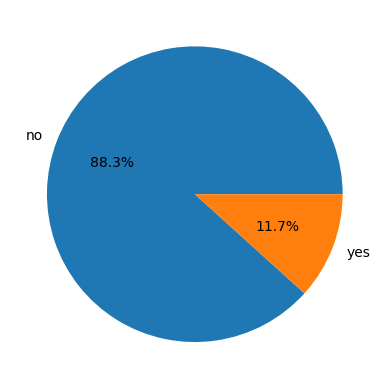

In [10]:
indexY=data['y'].value_counts().index
valuesY=data['y'].value_counts().values

plt.pie(valuesY,labels=indexY,autopct='%1.1f%%')

El 11.7% Acepto el deposito a plazo

In [11]:
dataNum = data[['age','balance','dur','campaign','pdays','previous','y']]
dataCat = data[['job','marital','edu','default','housing','loan','contact','month','day','poutcome','y']]
dataCatYes=dataCat[dataCat['y'] == 'yes']
dataCatNo=dataCat[dataCat['y'] == 'no']
dataNumYes=dataNum[dataNum['y'] == 'yes']
dataNumNo=dataNum[dataNum['y'] == 'yes']

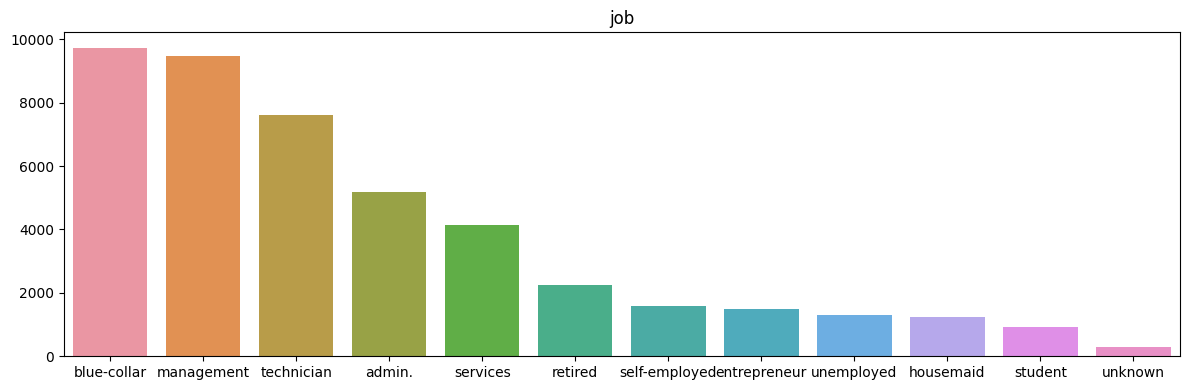

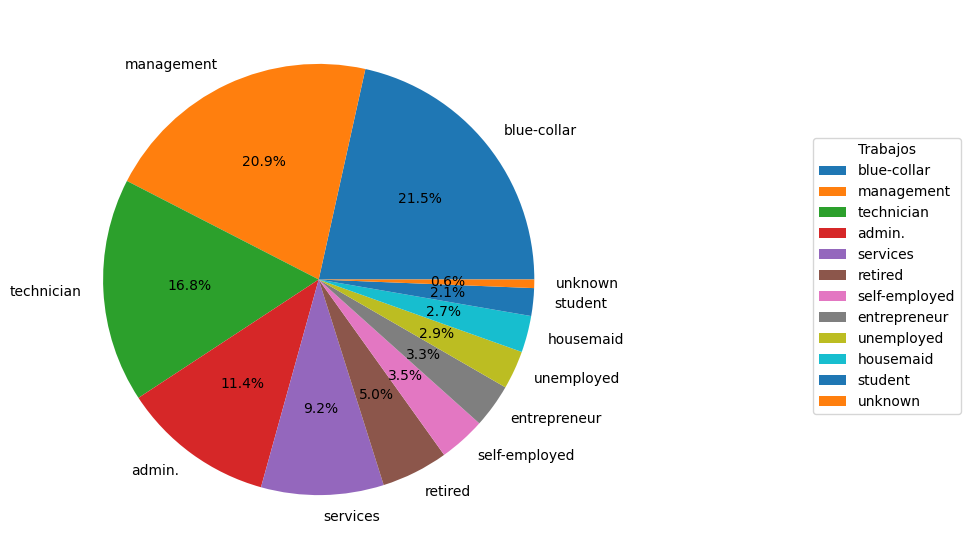

In [12]:
plt.figure(figsize=(12,4))
indexCat=dataCat['job'].value_counts().index
valuesCat=dataCat['job'].value_counts().values
    
sea.barplot(data=dataCat,y=valuesCat,x=indexCat)
    
plt.title('job')
plt.tight_layout()
fig = plt.figure(figsize =(10, 7))
plt.pie(valuesCat,labels=indexCat,autopct='%1.1f%%')
fig.legend(indexCat,title="Trabajos",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

Podemos observar que la mayor fuerza de trabajo contacta pertenece a la administrativa: Management (20.9%), Administration (11.4%). Junto a la de ejecucion: Blue-collar (21.5%), Technician (16.8%), siendo el 70.6% de todos los contactos.  
2) ¿Este perfil se mantiene? corroborar con los que aceptaron.

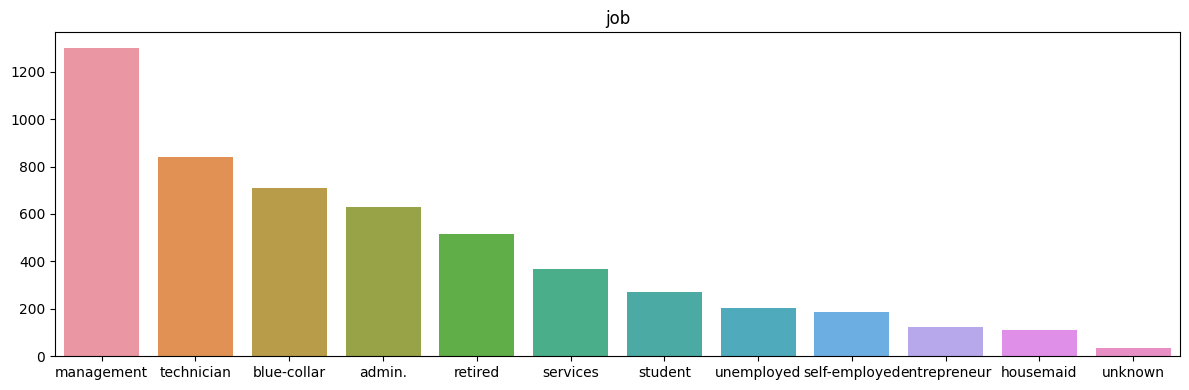

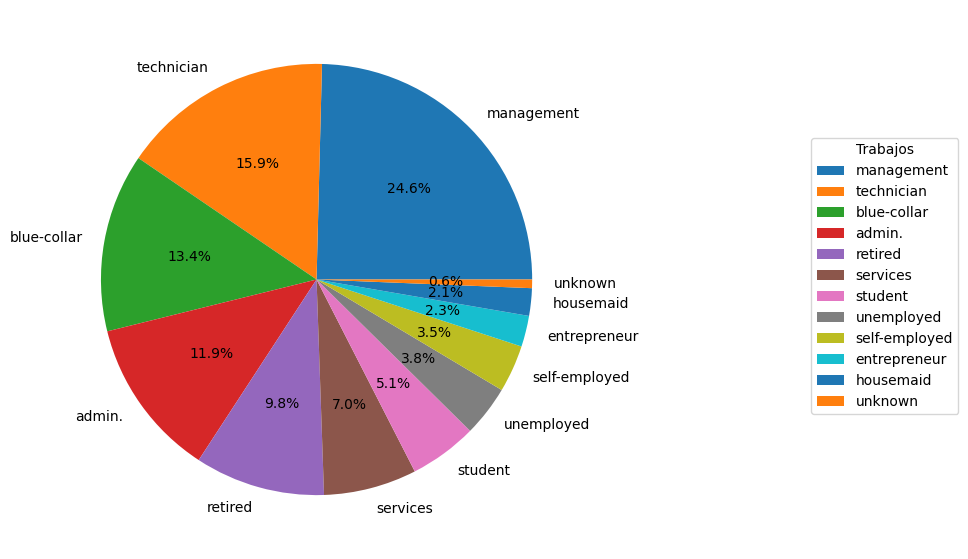

In [13]:
plt.figure(figsize=(12,4))
indexCatYes=dataCatYes['job'].value_counts().index
valuesCatYes=dataCatYes['job'].value_counts().values

sea.barplot(data=dataCatYes,y=valuesCatYes,x=indexCatYes)
    
plt.title('job')
plt.tight_layout()
fig = plt.figure(figsize =(10, 7))
plt.pie(valuesCatYes,labels=indexCatYes,autopct='%1.1f%%')
fig.legend(indexCatYes,title="Trabajos",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

Aunque se mantienen los factores (administracion y ejecucion), el orden cambia, siendo Management una mayor fuerza, estos 4 trabajos ahora representan el 65% de la fuerza de trabajo de los sujetos que han aceptado. 

3) De estos 4 grupos ¿Cual registra la mayor tasa de aceptacion? a su vez, de este mayor grupo comparar valores de default, loan y housing entre los que aceptaron y no.

In [14]:
dataCatBC=dataCat[dataCat['job'] == 'blue-collar']
dataCatTech=dataCat[dataCat['job'] == 'technician']
dataCatManag=dataCat[dataCat['job'] == 'management']
dataCatAdm=dataCat[dataCat['job'] == 'admin.']

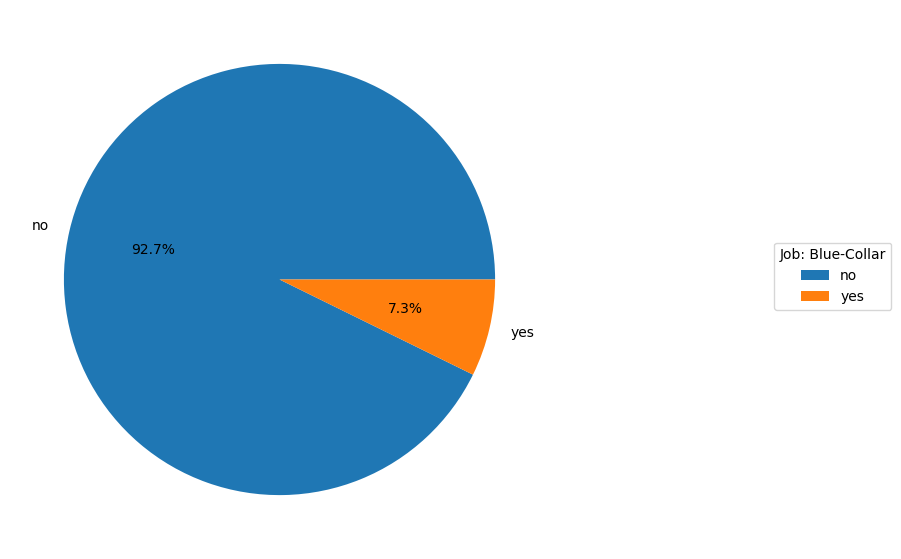

In [15]:
index=dataCatBC['y'].value_counts().index
values=dataCatBC['y'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title="Job: Blue-Collar",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

Para los blue-collar podemos ver que el 7.3% acepto

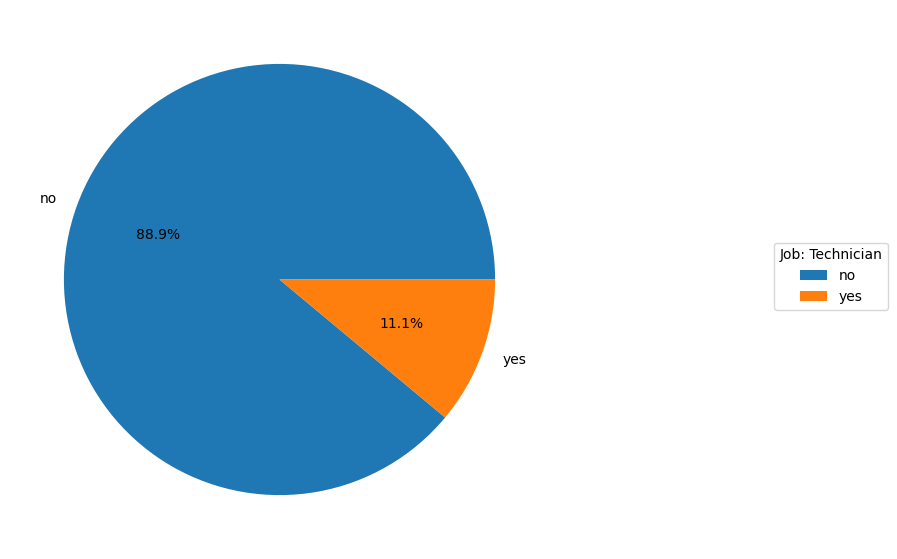

In [16]:
index=dataCatTech['y'].value_counts().index
values=dataCatTech['y'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title="Job: Technician",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

El 11.1% de los Technician acepto

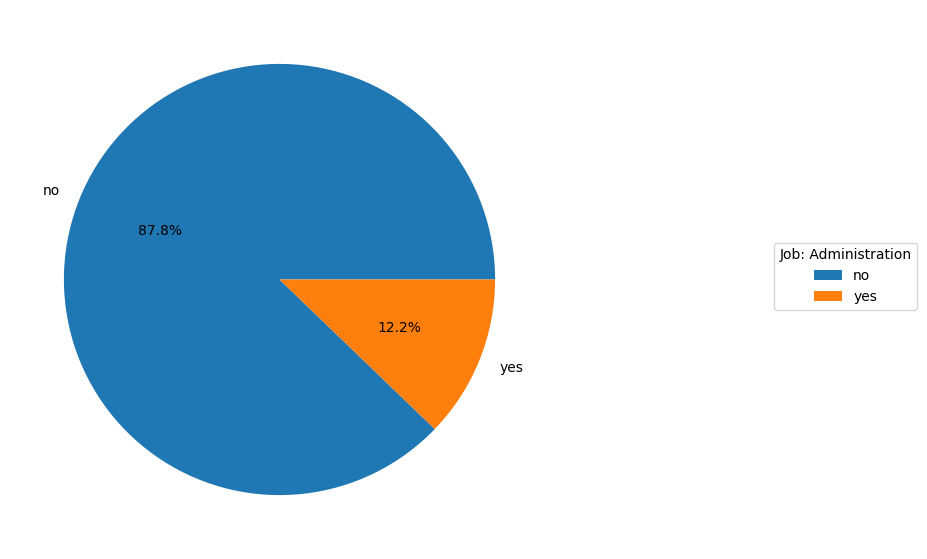

In [17]:
index=dataCatAdm['y'].value_counts().index
values=dataCatAdm['y'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title="Job: Administration",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

El 12.2% de los job: Administration aceptaron

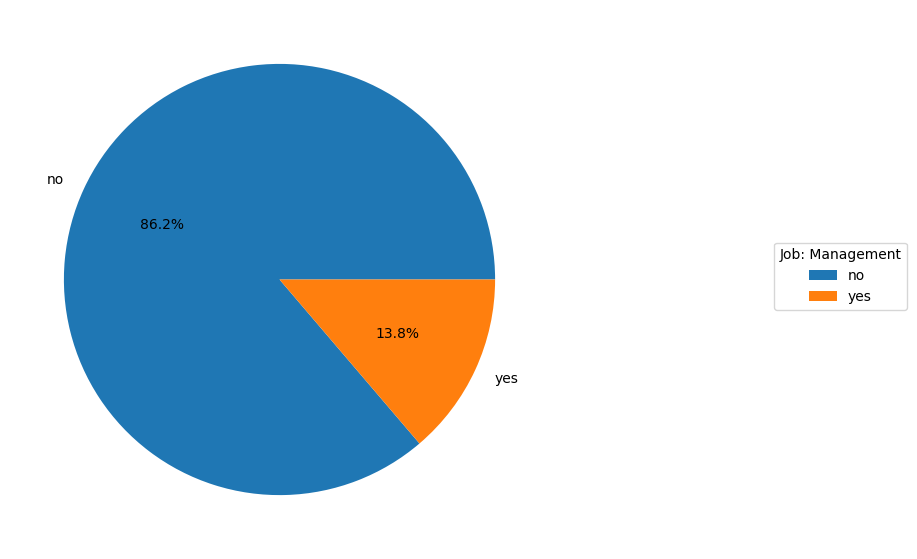

In [18]:
index=dataCatManag['y'].value_counts().index
values=dataCatManag['y'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title="Job: Management",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

La mayor fuerza que acepto (correspondiente a los Management) registra un 13.8% de aceptacion, por lo cual se procedera a comparar los 'Yes' y los 'No' con las columnas, default, loan y housing.

In [19]:
dataCatManagYes=dataCatManag[dataCatManag['y'] == 'yes']
dataCatManagNo=dataCatManag[dataCatManag['y'] == 'no']

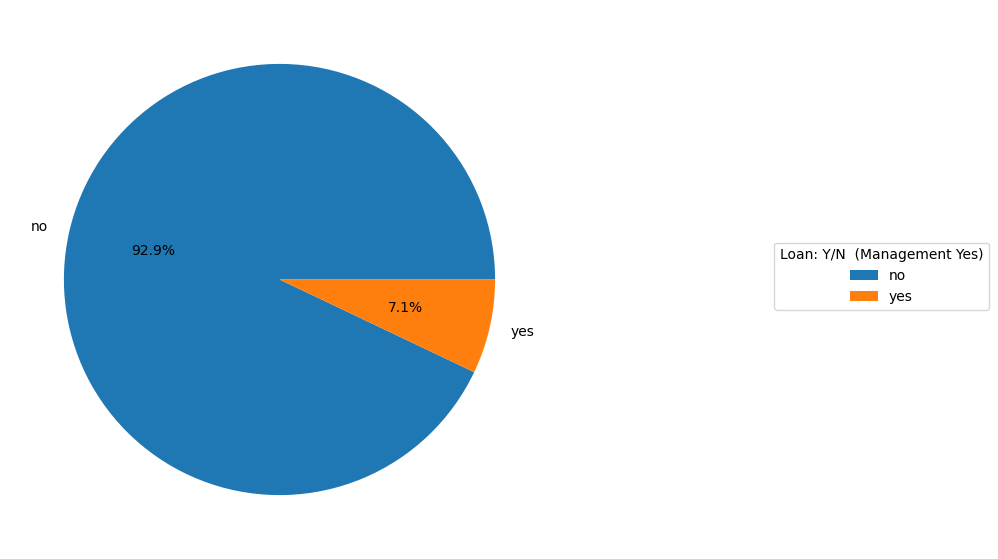

In [20]:
index=dataCatManagYes['loan'].value_counts().index
values=dataCatManagYes['loan'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title="Loan: Y/N  (Management Yes)",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

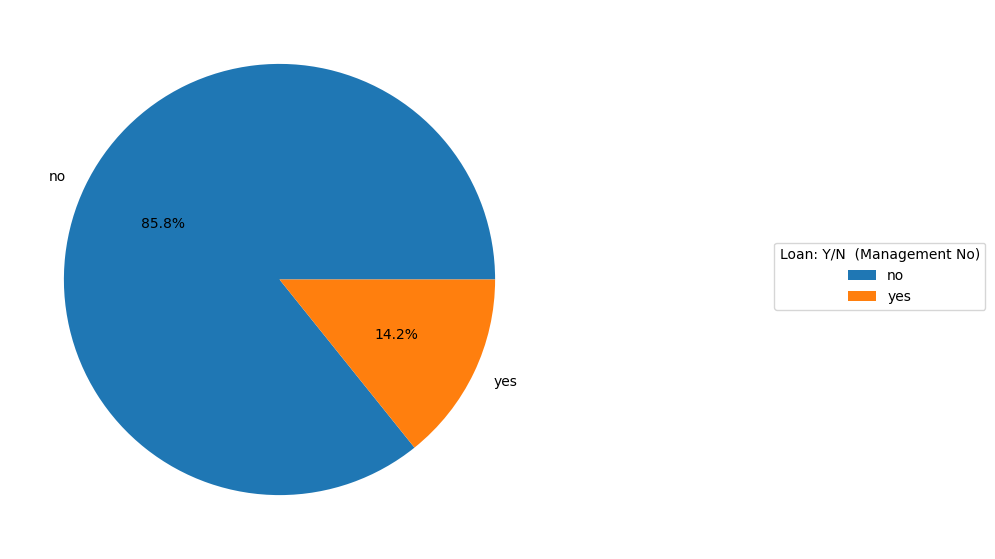

In [21]:
index2=dataCatManagNo['loan'].value_counts().index
values2=dataCatManagNo['loan'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values2,labels=index2,autopct='%1.1f%%')
fig.legend(index2,title="Loan: Y/N  (Management No)",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

De los que aceptaron, 7.1% a pedido un prestamo personal, mientras que de los que no aceptaron y han pedido prestamo, los duplican (14.2%). Por lo tanto, podemos referirnos a los que han pedido prestamo como una fuerza a considerar, pues es más probable que rechaze si este ha pedido un prestamo personal.

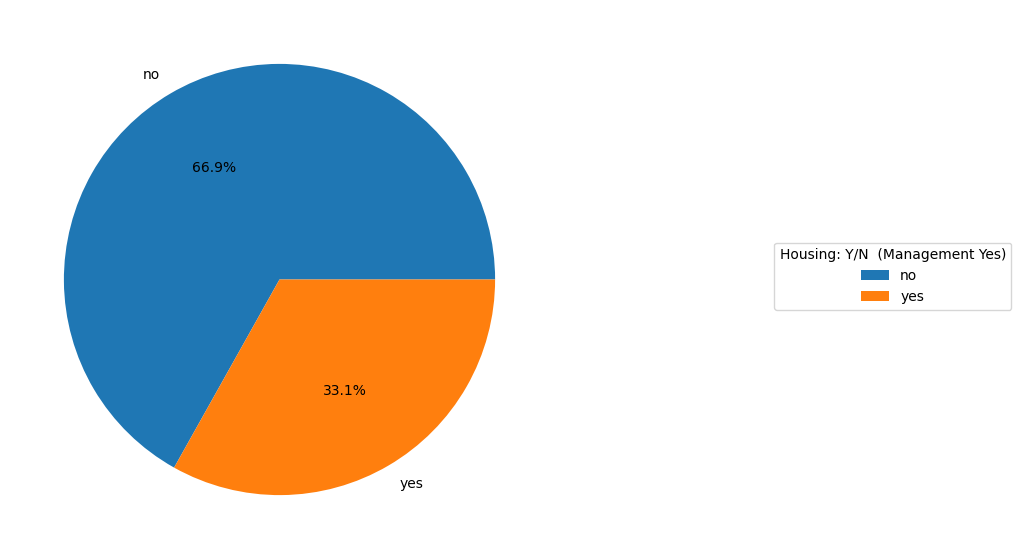

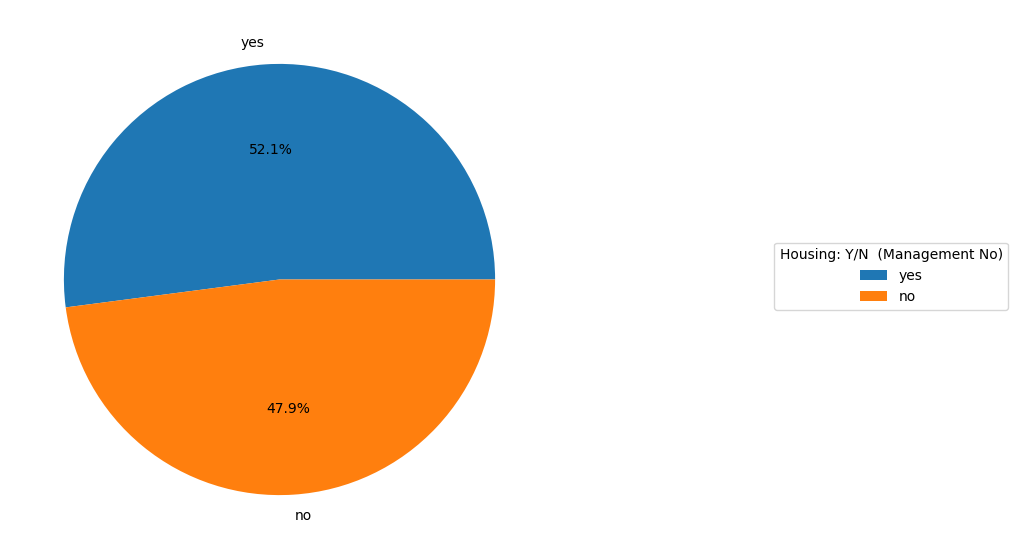

In [22]:
index=dataCatManagYes['housing'].value_counts().index
values=dataCatManagYes['housing'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title="Housing: Y/N  (Management Yes)",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

index2=dataCatManagNo['housing'].value_counts().index
values2=dataCatManagNo['housing'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values2,labels=index2,autopct='%1.1f%%')
fig.legend(index2,title="Housing: Y/N  (Management No)",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

El 33.1% de los sujetos que han pedido una hipoteca a aceptado, mientras que el 52.1% de los que han pedido una hipoteca a rechazado. Al igual que la propuesta anterior, los porcentajes de sujetos que aceptan, tienden a ser sujetos que no han pedido algun tipo de prestamo (hipoteca)

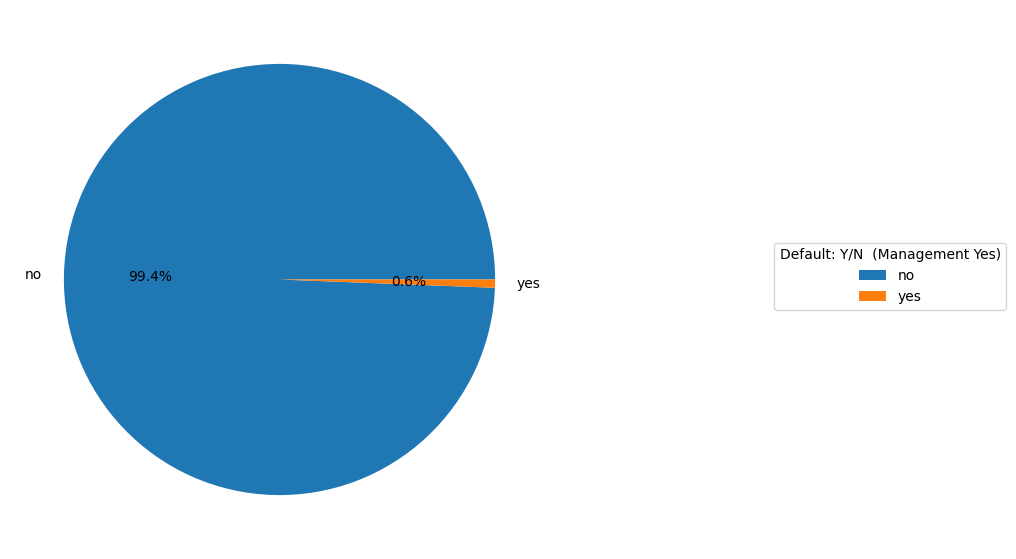

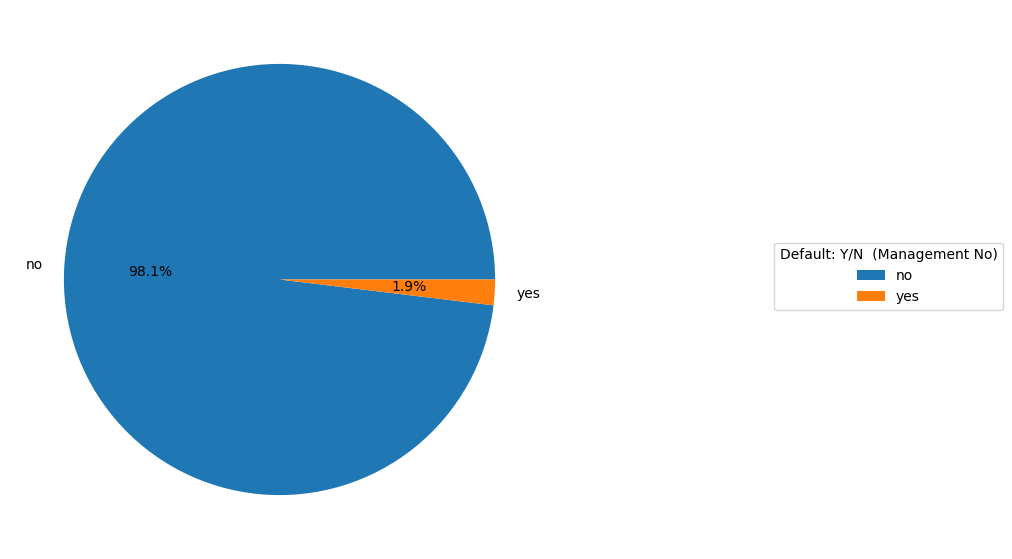

In [23]:
index=dataCatManagYes['default'].value_counts().index
values=dataCatManagYes['default'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title="Default: Y/N  (Management Yes)",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

index2=dataCatManagNo['default'].value_counts().index
values2=dataCatManagNo['default'].value_counts().values

fig = plt.figure(figsize =(10, 7))
plt.pie(values2,labels=index2,autopct='%1.1f%%')
fig.legend(index2,title="Default: Y/N  (Management No)",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

Solo el 0.6% de los sujetos que aceptaron esta en Default, mientras de los sujetos que rechazaron, el 1.9% esta en default. Nuevamente, siguiendo la tendencia, si el sujeto presenta 1 o más deudas/prestamos, es más probable que no acepte. 

4) ¿Que perfil presenta el sujeto que acepta estando en default/Loan/Housing?

In [25]:
dataCatManagNoDoubt =dataCatManagNo[(dataCatManagNo['loan'] == 'yes') | (dataCatManagNo['default'] == 'yes') | (dataCatManagNo['housing'] == 'yes')]

Declaro un subdataframe que contenga a los sujetos que han rechazado y poseen deudas

In [26]:
dataCatManagYesDoubt =dataCatManagYes[(dataCatManagYes['loan'] == 'yes') | (dataCatManagYes['default'] == 'yes') | (dataCatManagYes['housing'] == 'yes')]

Declaro un subdataframe de los que han aceptado y poseen deudas

RECORDAR QUE LAS SIGUIENTES GRAFICAS SON DE SUJETOS CON ALGUN TIPO DE PRESTAMO (loan,default,housing) COMO TAMBIEN PERTENECIENTE A LA MAYOR FUERZA DE TRABAJO (Management)

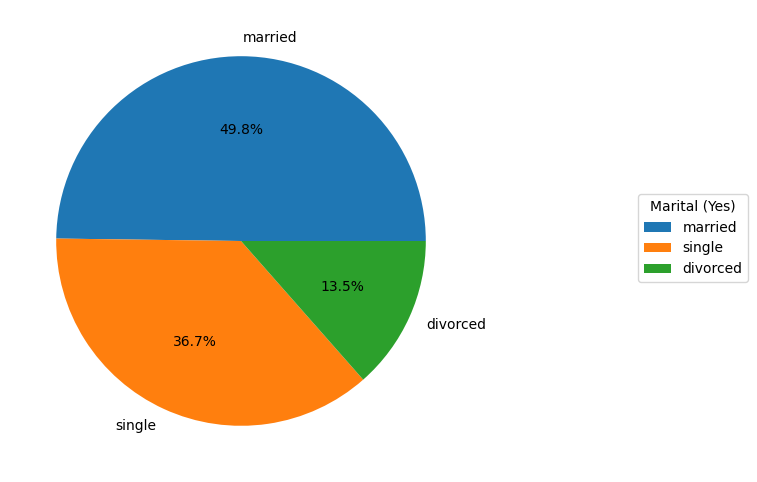

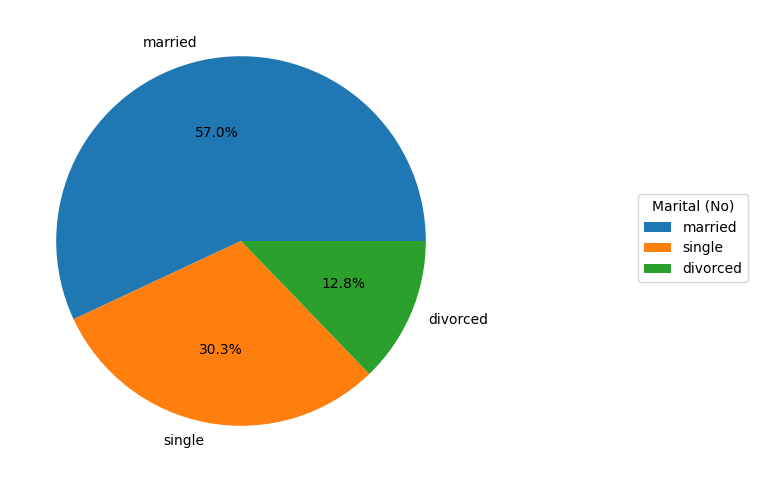

In [27]:
index=dataCatManagYesDoubt['marital'].value_counts().index
values=dataCatManagYesDoubt['marital'].value_counts().values

fig = plt.figure(figsize =(8, 6))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title='Marital (Yes)',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    
index2=dataCatManagNoDoubt['marital'].value_counts().index
values2=dataCatManagNoDoubt['marital'].value_counts().values

fig = plt.figure(figsize =(8, 6))
plt.pie(values2,labels=index2,autopct='%1.1f%%')
fig.legend(index2,title='Marital (No)',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

Sujetos casados son más propensos a aceptar que sujetos casados, la diferencia entre divorciados es infima.

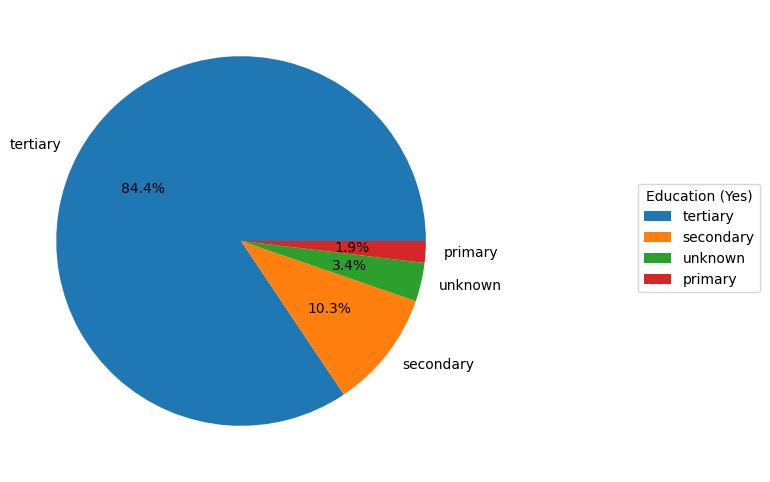

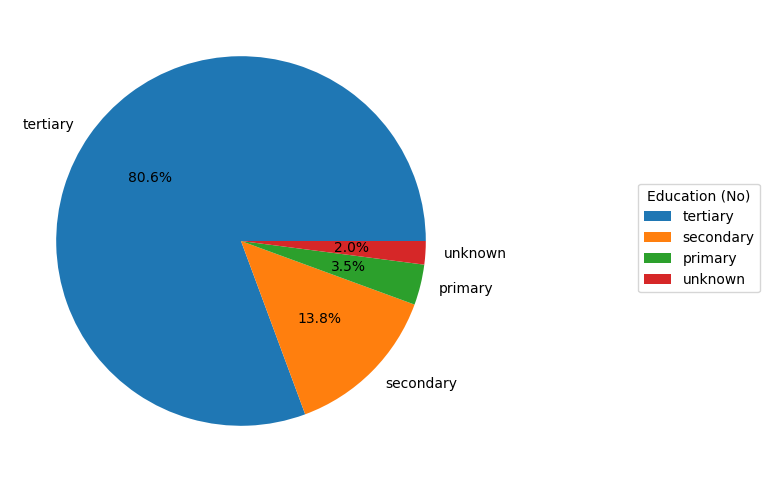

In [28]:
index=dataCatManagYesDoubt['edu'].value_counts().index
values=dataCatManagYesDoubt['edu'].value_counts().values

fig = plt.figure(figsize =(8, 6))
plt.pie(values,labels=index,autopct='%1.1f%%')
fig.legend(index,title='Education (Yes)',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    
index2=dataCatManagNoDoubt['edu'].value_counts().index
values2=dataCatManagNoDoubt['edu'].value_counts().values

fig = plt.figure(figsize =(8, 6))
plt.pie(values2,labels=index2,autopct='%1.1f%%')
fig.legend(index2,title='Education (No)',loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

La educacion no parecer ser un punto importante dentro del grupo de estudio

In [29]:
dataNumManagYesDoubt=data[(data['y'] == 'yes')]
dataNumManagNoDoubt=data[(data['y'] == 'no')]

In [30]:
dataNumManagYesDoubt=dataNumManagYesDoubt[(dataNumManagYesDoubt['loan'] == 'yes') | (dataNumManagYesDoubt['default'] == 'yes') | (dataNumManagYesDoubt['housing'] == 'yes')]
dataNumManagNoDoubt=dataNumManagNoDoubt[(dataNumManagNoDoubt['loan'] == 'yes') | (dataNumManagNoDoubt['default'] == 'yes') | (dataNumManagNoDoubt['housing'] == 'yes')]

<AxesSubplot: ylabel='age'>

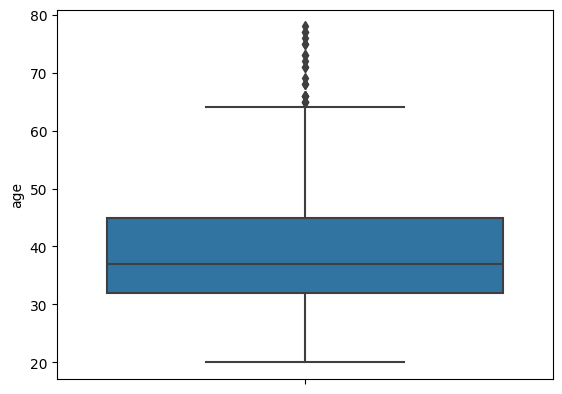

In [31]:
sea.boxplot(data=dataNumManagYesDoubt, y=dataNumManagYesDoubt['age'])

<AxesSubplot: ylabel='age'>

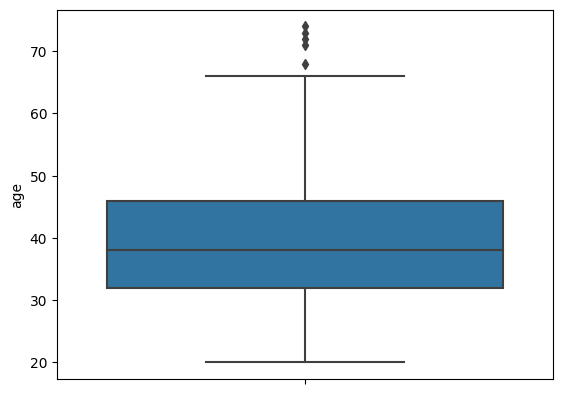

In [32]:
sea.boxplot(data=dataNumManagNoDoubt, y=dataNumManagNoDoubt['age'])

No parecer haber diferencia a considerar en las edades de los sujetos que recharazon (con deudas) con los sujetos que aceptaron (con deudas).

Como analisis final, respondiendo la pregunta 4, podemos afirmar que dentro del grupo de estudio de los perfiles con el job Management (principal fuerza de trabajo que ha aceptado), sujetos con deudas son más probable que rechazen como tambien, sujetos casados, a su vez, la edad y la educacion no toman un papel relevante a la hora de aceptar o no en comparacion al factor deudor.